<div style="background-color:maroon; padding:10px;">
</div>

# AM 205 - Advanced Scientific Computing: Numerical Methods
<div style="background-color:maroon; padding:10px;">
</div>

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Prof. Nick Trefethen<br/>
**Author**: Elaine Swanson

### 1. **p8.m** 
#### Unfortunately, Chebfun is a MATLAB-specific toolbox, and there isn't a direct equivalent for the Python language. However, we can use some py libs to approximate the behavior of Chebfun. This isn't quite the same. Please use Matlab to practice this. 
- The goal is to simulate Chebfun's ability to work with functions and operators using continuous analogs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, exp, sin, integrate, diff, solve
from scipy.integrate import quad
from scipy.optimize import fsolve
from sympy import Matrix

In [2]:
## define x and f as a symbolic variable and function (like Chebfun)
x = symbols('x')
f = exp(x) * sin(50 * x)

## create numerical values for x for plotting
x_vals = np.linspace(-1, 1, 500)

## convert the symbolic function f to a numeric function for plotting
f_lambdified = np.vectorize(lambda x_num: float(f.subs(x, x_num)))

## get the y-values of f for plotting
f_vals = f_lambdified(x_vals)

## find max f and where it occurs
max_index = np.argmax(f_vals)
max_val = f_vals[max_index]
x_at_max = x_vals[max_index]

## compute the definite integral of f symbolically over the interval [-1, 1]
integral_f = integrate(f, (x, -1, 1))
integral_f_numeric = float(integral_f.evalf())

In [3]:
## Use fsolve to find the roots of the function
## fsolve is a root-finding algorithm from the scipy library that uses a numerical method, the Newton-Raphson method, and is not always correct
## I had to take out the 6th "root" value because it is incorrect. See here = "Root: -0.65931864, f(root): -0.5170918371350437". f(root) should basically be zero and it is not
roots = []

for guess in x_vals:
    root = fsolve(f_lambdified, guess)
    # fsolve can return duplicates, so we check if the root is already in the list
    if root not in roots and -1 <= root <= 1:
        roots.append(root[0])  

r_roots = np.unique(np.round(roots, decimals=8))
## drop the 6th value from r_roots because the algo got all roots "almost" correct
r_roots = np.delete(r_roots, 5)

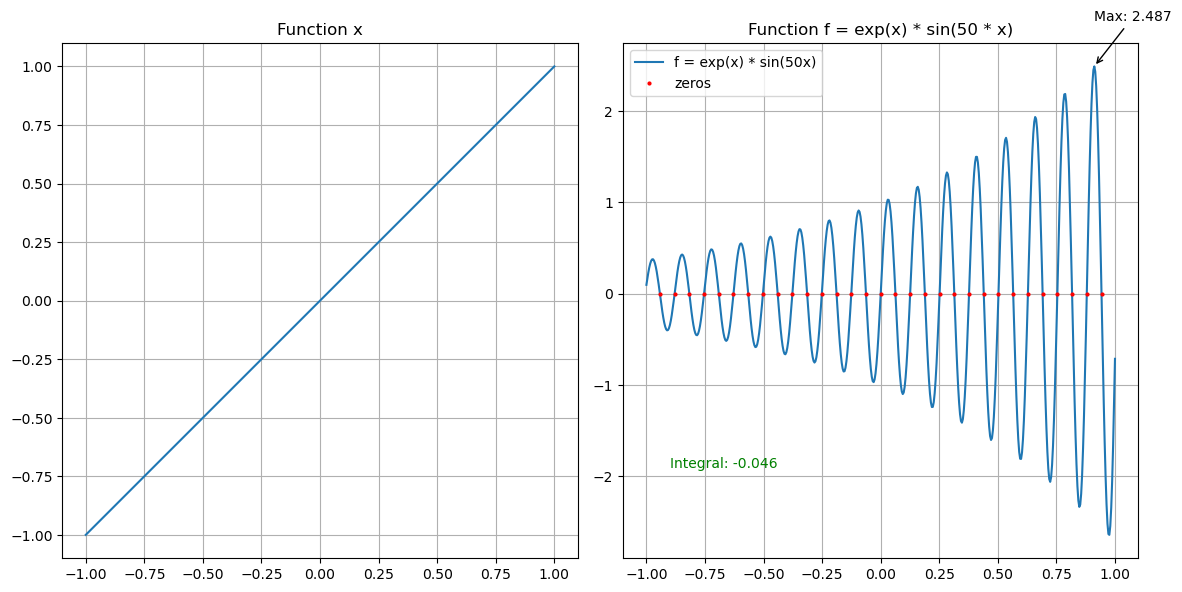

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

## plot the function x. Not very exciting.
axs[0].plot(x_vals, x_vals)
axs[0].set_title('Function x')
axs[0].grid(True)

## plot the function f 
axs[1].plot(x_vals, f_vals, label='f = exp(x) * sin(50x)')

## add the max val
axs[1].annotate(f'Max: {max_val:.3f}', xy=(x_at_max, max_val), xytext=(x_at_max, max_val + 0.5),
                arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10)

## add the integral val (this is oscillating so it cancels out and integral val is small)
axs[1].text(-0.9, -1.9, f'Integral: {integral_f_numeric:.3f}', fontsize=10, color='green')

for i, root in enumerate(r_roots):
    if i == 0:
        ## label the first root with 'zeros'
        axs[1].plot(root, 0, 'ro', markersize=2, label='zeros')
    else:
        axs[1].plot(root, 0, 'ro', markersize=2)

axs[1].set_title('Function f = exp(x) * sin(50 * x)')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

A **quasimatrix** is a mathematical object that behaves similarly to a matrix but with functions as its rows or columns, instead of finite-dimensional vectors. It can be thought of as a continuous analog of a standard matrix.
In Python, the concept of "quasimatrix" isn't directly built-in like in MATLAB's Chebfun library. However, we can achieve similar functionality with a massive row length. Maybe... idk. I'm just a TA. 

In [5]:
def quasimatrix_row(x, n):
    """
    Generates the first n rows of the quasimatrix for a given array x.
    
    Parameters:
    x : array-like, the variable.
    n : int, number of rows (powers) to generate.
    
    Returns:
    np.array of shape (n, len(x)), where each row corresponds to powers of x.
    """
    x = np.array(x)  
    return np.vstack([x**i for i in range(n)])

x_vals = np.linspace(-1, 1, 1000)
A = quasimatrix_row(x_vals, 5)
Atrans = A.T
print(Atrans.shape)

(1000, 5)


In [6]:
## solve the continuous least-squares problem A * c ≈ b by setting up rhs

## create a symbolic expression for b
b = abs(x) - x / 4

## lambdify b for plotting
b_lambdified = np.vectorize(lambda x_val: abs(x_val) - x_val / 4)
b_vals = b_lambdified(x_vals)

## use pseudoinverse to handle least-squares to solve A\b
Atrans_pinv = np.linalg.pinv(Atrans)
c = Atrans_pinv * b_vals

In [7]:
progress_counter = 0 
total = len(x_vals)

result = []

def progress_lambdified(x_val):
    global progress_counter
    ## calculate the sum for the current x_val
    result_val = sum(c[i] * x_val**i for i in range(len(c)))  # Numerical calculation

    ## increment progress and print updates every 1000 iterations
    progress_counter += 1
    if progress_counter % 100 == 0 or progress_counter == total:
        print(f"Progress: {progress_counter}/{total} ({progress_counter/total*100:.2f}%)")

    return result_val  # Return the numerical result directly

for x_val in x_vals:
    result.append(progress_lambdified(x_val))

result = np.array(result)

Progress: 100/1000 (10.00%)
Progress: 200/1000 (20.00%)
Progress: 300/1000 (30.00%)
Progress: 400/1000 (40.00%)
Progress: 500/1000 (50.00%)
Progress: 600/1000 (60.00%)
Progress: 700/1000 (70.00%)
Progress: 800/1000 (80.00%)
Progress: 900/1000 (90.00%)
Progress: 1000/1000 (100.00%)


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(x_vals, b_vals, label='b')
axs[0].set_title('Function b')
axs[0].grid(True)

axs[1].plot(x_vals, b_vals, label='b')
axs[1].plot(x_vals, result, 'r', label='A * c (Least Squares Fit)')
axs[1].set_title('Least Squares Fit. \n Not as good as we saw on Matlab')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()